In [4]:
import pickle
import numpy as np

input = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/140212114/lc.fluxes"
data = pickle.load(open(input, "rb"))

# only one continuous segment
dt = np.diff(data["time"])
mask = data["time"] < data["time"][np.flatnonzero(dt>0.5)[0]]
data["flux"] =  data["flux"][mask]
data["time"] =  data["time"][mask]
data["error"] =  data["error"][mask]
# sigma clip
mask = np.abs(data["flux"] - np.median(data["flux"])) < 3*np.std(data["flux"])
data["flux"] =  data["flux"][mask]
data["time"] =  data["time"][mask]
data["error"] =  data["error"][mask]

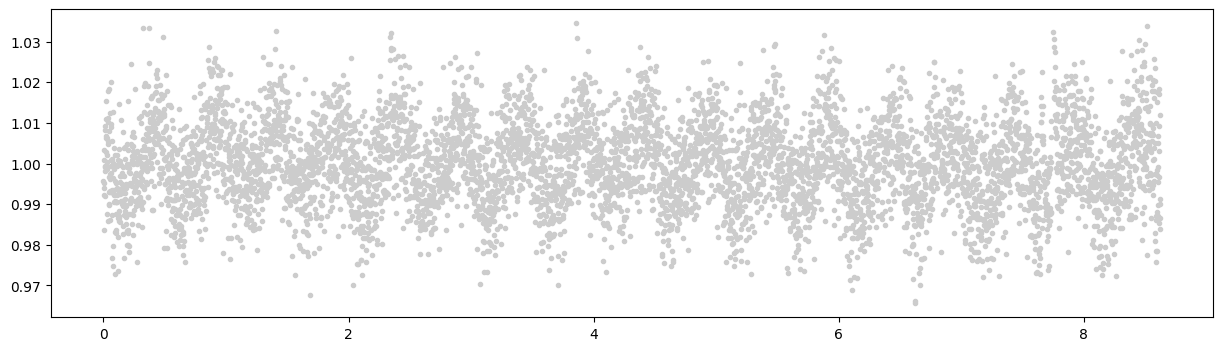

In [5]:
import matplotlib.pyplot as plt

plt.figure(None, (15, 4))
plt.plot(data["time"], data["flux"], ".", c="0.8")

In [6]:
from nuance.kernels import rotation
from nuance import Nuance

build_gp, init = rotation(data["star_period"], np.mean(data["error"]), long_scale=.5)
nu = Nuance(data["time"], data["flux"], data["error"])
optimize, mu, nll = nu.gp_optimization(build_gp)

new = optimize(init, ["log_sigma", "log_short_scale", "log_short_sigma", "log_long_sigma"])
new = optimize(new)

ScipyMinimizeInfo(fun_val=Array(-20011.32760469, dtype=float64, weak_type=True), success=False, status=2, iter_num=13)
ScipyMinimizeInfo(fun_val=Array(-20079.9480488, dtype=float64, weak_type=True), success=False, status=2, iter_num=44)


(0.0, 5.0)

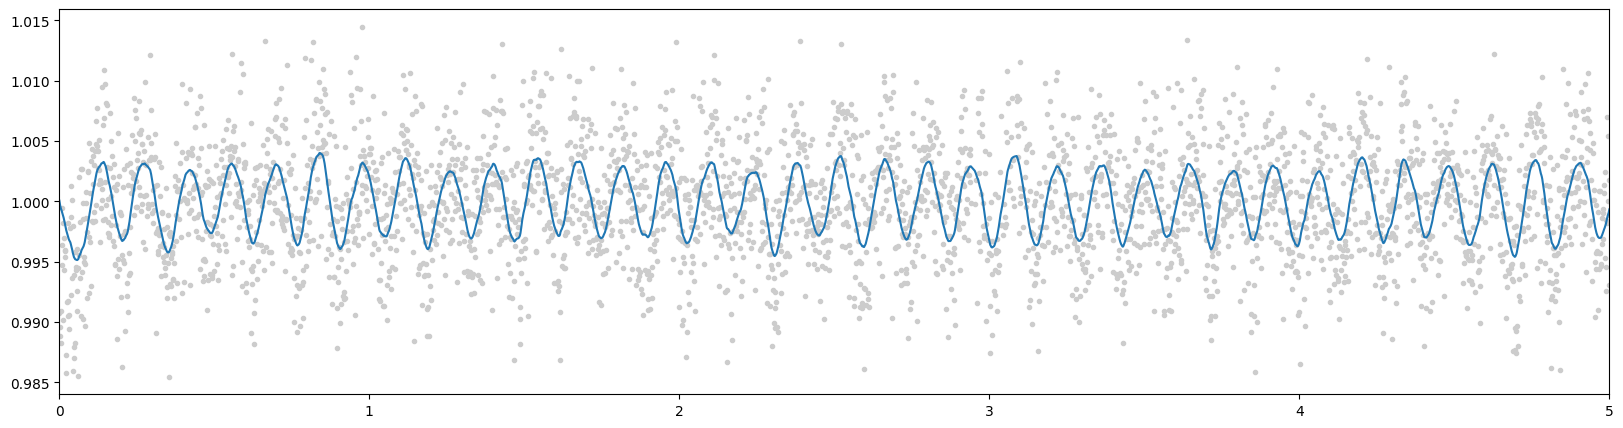

In [32]:
plt.figure(None, (20, 5))
plt.plot(data["time"], data["flux"], ".", c="0.8")
plt.plot(data["time"], mu(new))
plt.xlim(0, 5)

In [35]:
period*24

NameError: name 'period' is not defined

In [33]:
data

{'flux': array([0.9907501 , 0.9895584 , 0.98883885, ..., 1.0043477 , 0.99531794,
        0.9932204 ], dtype=float32),
 'time': array([0.00000000e+00, 1.38893209e-03, 2.77786441e-03, ...,
        1.20447155e+01, 1.20461044e+01, 1.20474933e+01]),
 'error': array([0.00468769, 0.00468636, 0.0046805 , ..., 0.00467474, 0.00467817,
        0.0046805 ], dtype=float32),
 'star_period': 0.1400778,
 'star_amplitude': 0.00775,
 'star_radius': 0.517266,
 'star_mass': 0.514858}

In [23]:
import yaml

output = "test.gp"

yaml.safe_dump({name: float(value) for name, value in new.items()}, open(output, "w"))